# README.md

###For each pt with an ADT ending date, find its T date and T value soon after 

# Step1, read from spreadsheet, clean up, and get statistics

In [3]:
import numpy as np
import pandas as pd
import sys, getopt
import csv
from datetime import datetime
from datetime import timedelta, date
import itertools

from matplotlib import pyplot
from pylab import *
import matplotlib.pyplot as plt

%matplotlib inline  
import seaborn as sns

In [4]:
df1=pd.read_csv("with_ADT_window.csv", header=0)
df1.fillna('', inplace=True)
df1['inital_ADT_end_date'] = pd.to_datetime(df1['inital_ADT_end_date'])

df2=pd.read_excel("pca_tresults_20210119_BP.xlsx", header=0)
#df3=pd.read_csv("just_start_empty.csv", header=0)

In [5]:
df1[:1]

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_timewindow,Inital_ADT_time_window_days,index1
0,2,2009-02-26,2017-02-01,2897 days 00:00:00.000000000,2897.0,0


In [6]:
df2[:1]

,person_id,cancer_type_id,year_of_diagnosis,month_of_diagnosis,day_of_diagnosis,dx_date,result_date,loinc_code,source_test_name,test_results
0,2,2,2003,1.0,7.0,2003-01-07,2006-09-05,49041-7,TESTOSTERONE,351


In [7]:
list_pts_adt_table=df1["person_id"].to_list()
list_pts_tvalue_table=df2["person_id"].to_list()

print("pt number in the adt table is:")
print(len(list_pts_adt_table))
print("")
print("pt number in the T value table is:")
print(len(list_pts_tvalue_table))

pt number in the adt table is:
792

pt number in the T value table is:
18643


In [8]:
index_list=df2.columns
index_list

Index(['person_id', 'cancer_type_id', 'year_of_diagnosis',
       'month_of_diagnosis', 'day_of_diagnosis', 'dx_date', 'result_date',
       'loinc_code', 'source_test_name', 'test_results'],
      dtype='object')

In [9]:
print(df2.shape)
#delete some useless columns
del_col=['cancer_type_id', 'year_of_diagnosis', 'month_of_diagnosis', 'day_of_diagnosis', 'dx_date','loinc_code', 'source_test_name']

for col in del_col:
    del df2[col]
print(df2.shape)

(18643, 10)
(18643, 3)


In [10]:
y=2

df1_pt=df1[(df1["person_id"] == y)]
df2_pt=df2[(df2["person_id"] == y)]

In [11]:
df1_pt

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_timewindow,Inital_ADT_time_window_days,index1
0,2,2009-02-26,2017-02-01,2897 days 00:00:00.000000000,2897.0,0


In [12]:
df2_pt

,person_id,result_date,test_results
0,2,2006-09-05,351
1,2,2007-01-09,304
2,2,2007-05-17,259
3,2,2007-06-12,382
4,2,2007-06-28,439
...,...,...,...
77,2,2017-02-01,15.64
78,2,2017-02-22,7.72
79,2,2017-03-18,11.29
80,2,2017-03-22,11.14


In [13]:
def closest(lst, K): 
      return lst[min(range(len(lst)), key = lambda i: abs(lst[i] - K))] 

In [14]:
df2_pt=df2[(df2["person_id"] == 2)]    
each_pt_tdates = df2_pt['result_date'].to_list()
#each_pt_tdates

In [15]:
result_list=[]

#for y in list_pts:      
for y in [2]:
    
    df1_pt=df1[(df1["person_id"] == y)]
    a=df1_pt['inital_ADT_end_date'].to_list()[0]
    #add 6 months to the inital ADT end date
    #a_plus_6mons=a + timedelta(days=180)
    
    #pick up initial ADT window 
    gap=df1_pt['Inital_ADT_time_window_days'].to_list()[0] 
    
    df2_pt=df2[(df2["person_id"] == y)]    
    each_pt_tdates = df2_pt['result_date'].to_list()

    ##get rid of nan
    cleaned_a=[]
    cleaned_a= [x for x in each_pt_tdates if str(x) != 'NaN']
    cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
    cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
    N_t_dates=len(cleaned_aaa)
    #only keep the ones after ADT end date
    cleaned_aaaa= [x for x in cleaned_aaa if x >=a]
    start_sorted_bin=sorted(cleaned_aaaa)
    #count 
    N_t_dates_afterADT=len(cleaned_aaaa)
    if(len(start_sorted_bin)==0):
        tdate='NaN'  

    if(len(start_sorted_bin)>0):
        #apply the closet function
        #tdate=closest(start_sorted_bin,a_plus_6mons)
        tdate=closest(start_sorted_bin,a)
        #tvalue=df2_pt.loc[df['result_date'] == tdate].test_result
    
    #pick up T-value for T-date
    df2_pt_pick=df2_pt[(df2_pt['result_date']==tdate)]
    tvalue=df2_pt_pick.test_results.values[0]
    
    print(y, a, gap,tdate, tvalue,N_t_dates,N_t_dates_afterADT)
    result_per_pt=[y, a, gap, tdate, tvalue,N_t_dates,N_t_dates_afterADT]
    result_list.append(result_per_pt)

2 2017-02-01 00:00:00 2897.0 2017-02-01 00:00:00 15.64 82 5


In [16]:
#do it for all pts in the list
#this is for the T date and value immedately after the ADT end date

In [17]:
result_list=[]

#for y in list_pts:      
for y in list_pts_adt_table:
    
    df1_pt=df1[(df1["person_id"] == y)]
    a=df1_pt['inital_ADT_end_date'].to_list()[0]
    #add 6 months to the inital ADT end date
    #a_plus_6mons=a + timedelta(days=180)
    
    #pick up initial ADT window 
    gap=df1_pt['Inital_ADT_time_window_days'].to_list()[0] 
    
    df2_pt=df2[(df2["person_id"] == y)]    
    each_pt_tdates = df2_pt['result_date'].to_list()

    ##get rid of nan
    cleaned_a=[]
    cleaned_a= [x for x in each_pt_tdates if str(x) != 'NaN']
    cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
    cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
    N_t_dates=len(cleaned_aaa)

    
    #only keep the ones after ADT end date
    cleaned_aaaa= [x for x in cleaned_aaa if x >=a]
    start_sorted_bin=sorted(cleaned_aaaa)
    N_t_dates_afterADT=len(cleaned_aaaa)
    
    if(len(start_sorted_bin)==0):
        tdate='NaN' 
        tvalue="NaN"

    if(len(start_sorted_bin)>0):
        #apply the closet function
        #tdate=closest(start_sorted_bin,a_plus_6mons)
        tdate=closest(start_sorted_bin,a)
        #tvalue=df2_pt.loc[df['result_date'] == tdate].test_result
    
        #pick up T-value for T-date
        df2_pt_pick=df2_pt[(df2_pt['result_date']==tdate)]
        tvalue=df2_pt_pick.test_results.values[0]
    
    print(y, a, gap,tdate, tvalue,N_t_dates,N_t_dates_afterADT)
    result_per_pt=[y, a, gap, tdate, tvalue,N_t_dates,N_t_dates_afterADT]
    result_list.append(result_per_pt)

2 2017-02-01 00:00:00 2897.0 2017-02-01 00:00:00 15.64 82 5
13 2018-05-17 00:00:00 2891.0 NaN NaN 23 0
18 2014-03-13 00:00:00 121.0 2014-12-02 00:00:00 31.3 5 5
22 2017-04-24 00:00:00 2401.0 NaN NaN 3 0
25 2014-02-18 00:00:00 98.0 2015-02-18 00:00:00 149.89 12 11
37 2016-09-02 00:00:00 2165.0 2016-09-27 00:00:00 14.74 23 1
38 2016-07-18 00:00:00 243.0 2016-07-18 00:00:00 17.18 20 13
95 2014-04-23 00:00:00 1204.0 2014-04-28 00:00:00 <10.00 25 1
119 2013-10-02 00:00:00 92.0 2013-11-15 00:00:00 18.24 12 10
125 2020-09-02 00:00:00 1682.0 NaN NaN 18 0
132 2016-07-13 00:00:00 457.0 2016-10-20 00:00:00 8.41 1 1
137 2020-09-10 00:00:00 1900.0 NaN NaN 19 0
153 2020-02-12 00:00:00 2051.0 2020-02-12 00:00:00 <3 2 1
267 2016-05-12 00:00:00 359.0 2016-05-23 00:00:00 7.77 35 28
275 2020-09-15 00:00:00 281.0 NaN NaN 12 0
323 2016-09-07 00:00:00 364.0 NaN NaN 7 0
341 2017-05-19 00:00:00 366.0 NaN NaN 39 0
387 2018-08-21 00:00:00 84.0 2018-10-31 00:00:00 <3 4 4
780 2010-09-30 00:00:00 28.0 2010-10-28 0

7532 2020-08-28 00:00:00 1123.0 NaN NaN 5 0
7611 2018-09-12 00:00:00 1303.0 2019-01-14 00:00:00 8.31 34 18
7615 2014-04-17 00:00:00 1004.0 NaN NaN 12 0
7798 2020-11-03 00:00:00 2177.0 NaN NaN 45 0
7900 2016-08-31 00:00:00 887.0 2016-11-07 00:00:00 16.46 4 1
7977 2015-11-12 00:00:00 491.0 2015-11-12 00:00:00 32.4 6 1
8020 2019-04-29 00:00:00 341.0 2019-04-29 00:00:00 <4.33 20 10
8024 2018-01-29 00:00:00 91.0 2018-04-30 00:00:00 9.48 5 5
8194 2013-12-09 00:00:00 700.0 2014-02-24 00:00:00 <10.00 14 3
8224 2017-02-14 00:00:00 812.0 2017-02-14 00:00:00 <12.98 6 2
8272 2016-10-14 00:00:00 70.0 2016-10-24 00:00:00 12.19 18 17
8302 2014-06-09 00:00:00 432.0 2014-09-15 00:00:00 19.93 22 16
8303 2012-03-21 00:00:00 504.0 2014-07-16 00:00:00 276.83 3 2
8310 2020-08-12 00:00:00 142.0 NaN NaN 5 0
8330 2011-07-21 00:00:00 167.0 2014-03-17 00:00:00 263.81 15 15
8360 2019-02-28 00:00:00 780.0 NaN NaN 9 0
8420 2019-08-02 00:00:00 338.0 2019-08-21 00:00:00 220.48 9 6
8544 2018-08-03 00:00:00 177.0 2018-

16872 2020-10-19 00:00:00 2539.0 NaN NaN 15 0
16957 2018-10-12 00:00:00 63.0 NaN NaN 1 0
17004 2013-04-29 00:00:00 991.0 NaN NaN 15 0
17033 2018-11-27 00:00:00 196.0 NaN NaN 1 0
17206 2020-08-24 00:00:00 96.0 NaN NaN 7 0
17321 2017-08-21 00:00:00 2329.0 NaN NaN 2 0
17341 2018-07-08 00:00:00 187.0 2018-07-13 00:00:00 <3 5 2
17395 2020-09-02 00:00:00 1213.0 NaN NaN 9 0
17419 2016-08-24 00:00:00 98.0 2016-08-24 00:00:00 10.12 6 6
17558 2020-09-28 00:00:00 1803.0 NaN NaN 7 0
17559 2015-11-24 00:00:00 120.0 2016-03-04 00:00:00 24.06 8 3
17580 2020-02-10 00:00:00 845.0 NaN NaN 7 0
17662 2020-09-30 00:00:00 2477.0 NaN NaN 40 0
17709 2013-10-14 00:00:00 28.0 2013-10-14 00:00:00 <10.00 25 22
17710 2020-09-21 00:00:00 1174.0 NaN NaN 49 0
17759 2015-05-29 00:00:00 266.0 2015-05-29 00:00:00 <10.00 13 10
17782 2019-04-15 00:00:00 1362.0 2019-04-15 00:00:00 <4.33 30 3
17793 2015-05-22 00:00:00 290.0 2015-05-22 00:00:00 20.18 16 14
17865 2014-12-17 00:00:00 138.0 NaN NaN 2 0
18025 2020-10-12 00:00:00

27211 2017-04-27 00:00:00 106.0 2017-04-27 00:00:00 13.74 3 1
27252 2020-09-09 00:00:00 1071.0 NaN NaN 1 0
27277 2018-07-09 00:00:00 95.0 2018-07-09 00:00:00 11.31 15 7
27282 2018-05-26 00:00:00 82.0 NaN NaN 3 0
27399 2018-12-14 00:00:00 108.0 2019-08-19 00:00:00 144 1 1
27458 2020-11-02 00:00:00 1571.0 NaN NaN 9 0
27466 2020-05-15 00:00:00 3594.0 NaN NaN 26 0
27515 2020-10-20 00:00:00 452.0 NaN NaN 2 0
27543 2018-11-14 00:00:00 84.0 2019-03-08 00:00:00 16.08 3 3
27563 2014-05-01 00:00:00 1039.0 NaN NaN 53 0
27583 2019-11-08 00:00:00 158.0 NaN NaN 18 0
27611 2020-10-16 00:00:00 210.0 NaN NaN 3 0
27619 2019-12-02 00:00:00 602.0 2019-12-02 00:00:00 13.16 4 3
27625 2020-07-08 00:00:00 89.0 2020-07-08 00:00:00 23.13 16 1
27656 2011-09-19 00:00:00 341.0 2011-09-19 00:00:00 38.8 42 36
27661 2016-04-08 00:00:00 1102.0 NaN NaN 13 0
27685 2020-10-07 00:00:00 2660.0 NaN NaN 22 0
27745 2020-09-11 00:00:00 280.0 NaN NaN 1 0
27766 2019-06-28 00:00:00 1305.0 2019-09-09 00:00:00 5.22 13 2
27769 2017-

35715 2018-08-01 00:00:00 940.0 NaN NaN 7 0
35723 2011-07-07 00:00:00 101.0 2011-09-15 00:00:00 <10.00 4 4
35774 2020-09-15 00:00:00 106.0 NaN NaN 7 0
35775 2020-05-29 00:00:00 725.0 2020-05-29 00:00:00 8.65 7 1
35799 2019-01-04 00:00:00 444.0 2019-01-04 00:00:00 19.8 10 2
35824 2020-10-14 00:00:00 2156.0 NaN NaN 27 0
35828 2019-12-17 00:00:00 1861.0 2020-03-12 00:00:00 <3 20 1
35847 2017-11-01 00:00:00 1023.0 2018-01-29 00:00:00 5 12 3
35869 2020-09-02 00:00:00 1941.0 2020-09-02 00:00:00 <4.33 21 1
35932 2013-12-23 00:00:00 536.0 NaN NaN 2 0
36062 2016-06-07 00:00:00 734.0 2016-09-06 00:00:00 11.73 21 18
36105 2011-12-08 00:00:00 93.0 NaN NaN 7 0
36190 2014-12-15 00:00:00 214.0 NaN NaN 1 0
36369 2016-06-23 00:00:00 168.0 2016-10-20 00:00:00 23.29 5 3
36403 2020-09-23 00:00:00 3017.0 NaN NaN 28 0
36404 2019-02-22 00:00:00 865.0 2019-02-22 00:00:00 <4.33 17 1
36508 2016-07-11 00:00:00 319.0 2016-07-11 00:00:00 13.76 18 15
36535 2018-06-11 00:00:00 306.0 2018-10-15 00:00:00 16 5 3
36537 

In [18]:
result_list

[[2,
  Timestamp('2017-02-01 00:00:00'),
  2897.0,
  Timestamp('2017-02-01 00:00:00'),
  15.64,
  82,
  5],
 [13, Timestamp('2018-05-17 00:00:00'), 2891.0, 'NaN', 'NaN', 23, 0],
 [18,
  Timestamp('2014-03-13 00:00:00'),
  121.0,
  Timestamp('2014-12-02 00:00:00'),
  31.3,
  5,
  5],
 [22, Timestamp('2017-04-24 00:00:00'), 2401.0, 'NaN', 'NaN', 3, 0],
 [25,
  Timestamp('2014-02-18 00:00:00'),
  98.0,
  Timestamp('2015-02-18 00:00:00'),
  149.89,
  12,
  11],
 [37,
  Timestamp('2016-09-02 00:00:00'),
  2165.0,
  Timestamp('2016-09-27 00:00:00'),
  14.74,
  23,
  1],
 [38,
  Timestamp('2016-07-18 00:00:00'),
  243.0,
  Timestamp('2016-07-18 00:00:00'),
  17.18,
  20,
  13],
 [95,
  Timestamp('2014-04-23 00:00:00'),
  1204.0,
  Timestamp('2014-04-28 00:00:00'),
  '<10.00',
  25,
  1],
 [119,
  Timestamp('2013-10-02 00:00:00'),
  92.0,
  Timestamp('2013-11-15 00:00:00'),
  18.24,
  12,
  10],
 [125, Timestamp('2020-09-02 00:00:00'), 1682.0, 'NaN', 'NaN', 18, 0],
 [132,
  Timestamp('2016-07-

In [19]:
df_results=pd.DataFrame(result_list)
#result_per_pt=[y, a, gap, tdate, tvalue]
#result_per_pt=[y, a, gap, tdate, tvalue,N_t_dates,N_t_dates_afterADT]
df_results.columns=(['person_id','inital_ADT_end_date','Inital_ADT_time_window_days', 'Tdate immediately after ADT', 'Tvalue',"N_T_dates","N_T_dates_afterADT"])

In [20]:
df_results

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate immediately after ADT,Tvalue,N_T_dates,N_T_dates_afterADT
0,2,2017-02-01,2897.0,2017-02-01,15.64,82,5
1,13,2018-05-17,2891.0,NaT,NaN,23,0
2,18,2014-03-13,121.0,2014-12-02,31.3,5,5
3,22,2017-04-24,2401.0,NaT,NaN,3,0
4,25,2014-02-18,98.0,2015-02-18,149.89,12,11
...,...,...,...,...,...,...,...
787,199348,2020-08-31,137.0,NaT,NaN,3,0
788,200563,2020-07-06,89.0,2020-07-06,23,1,1
789,201026,2020-10-01,128.0,NaT,NaN,1,0
790,203736,2020-10-14,99.0,NaT,NaN,1,0


In [52]:
#create a column for the time gap btw adt end date and T test date 
df_results['ADT_T_gap'] = df_results['Tdate immediately after ADT'] - df_results['inital_ADT_end_date']

#create a column for the inital adt use window as days
df_results['ADT_T_gap_days']=df_results['ADT_T_gap'].dt.days

In [53]:
df_results

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate immediately after ADT,Tvalue,N_T_dates,N_T_dates_afterADT,ADT_T_gap,ADT_T_gap_days
0,2,2017-02-01,2897.0,2017-02-01,15.64,82,5,0 days,0.0
1,13,2018-05-17,2891.0,NaT,NaN,23,0,NaT,NaN
2,18,2014-03-13,121.0,2014-12-02,31.3,5,5,264 days,264.0
3,22,2017-04-24,2401.0,NaT,NaN,3,0,NaT,NaN
4,25,2014-02-18,98.0,2015-02-18,149.89,12,11,365 days,365.0
...,...,...,...,...,...,...,...,...,...
787,199348,2020-08-31,137.0,NaT,NaN,3,0,NaT,NaN
788,200563,2020-07-06,89.0,2020-07-06,23,1,1,0 days,0.0
789,201026,2020-10-01,128.0,NaT,NaN,1,0,NaT,NaN
790,203736,2020-10-14,99.0,NaT,NaN,1,0,NaT,NaN


In [21]:
#find out number of patients that don't have T test 
df6=df_results["N_T_dates"]
print("number of patients that don't have T test")
print(df6.isin([0]).sum())

#find out number of patients that don't have T test after ADT
df7=df_results["N_T_dates_afterADT"]
print("number of patients that don't have T test after ADT")
print(df7.isin([0]).sum())

number of patients that don't have T test
0
number of patients that don't have T test after ADT
376


In [22]:
792-376

416

In [ ]:
#get the list of pts who don't have T test after ADT
#get rid of it from the cohort and do the histogram for the gap Analysis 

In [67]:
empty_test_afteradt_list=[]

for ind in df_results.index:
    if (df_results['N_T_dates_afterADT'][ind]==0): 
        empty_test_afteradt_list.append(ind)  

In [68]:
len(empty_test_afteradt_list)

0

In [69]:
df_clean_for_gap=df_results
print(shape(df_clean_for_gap))
for ind in empty_test_afteradt_list:
    df_clean_for_gap.drop(index=ind,inplace=True)
print(shape(df_clean_for_gap))

(416, 9)
(416, 9)


patient count      415.0
index2             788.0
ADT_T_gap_days    1631.0
dtype: float64
patient count     0.0
index2            0.0
ADT_T_gap_days    0.0
dtype: float64
(416, 2)


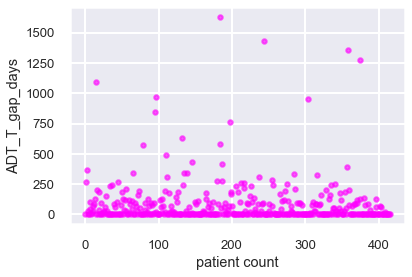

In [123]:
###scatter plot of the time gap from ADT end to first T test afterwards 
adttgap=df_clean_for_gap[['ADT_T_gap_days']].reset_index()
adttgap2=adttgap.reset_index()
adttgap2.columns = ['patient count','index2', 'ADT_T_gap_days']


ax=adttgap2.plot.scatter(x= "patient count", y="ADT_T_gap_days", c='magenta', alpha=0.6)
print(adttgap2.max())
print(adttgap2.min())

print(shape(adttgap))
#df_results['ADT_T_gap_days']

In [119]:
shape(adttgap2)

(416, 3)

In [120]:
adttgap2

,index1,index2,ADT_T_gap_days
0,0,0,0.0
1,1,2,264.0
2,2,4,365.0
3,3,5,25.0
4,4,6,0.0
...,...,...,...
411,411,772,0.0
412,412,774,0.0
413,413,775,0.0
414,414,783,0.0


In [76]:
print(adttgap.max())

level_0            415.0
index              788.0
ADT_T_gap_days    1631.0
dtype: float64


In [112]:
adttgap.reset_index()[:5]

,level_0,index,ADT_T_gap_days
0,0,0,0.0
1,1,2,264.0
2,2,4,365.0
3,3,5,25.0
4,4,6,0.0


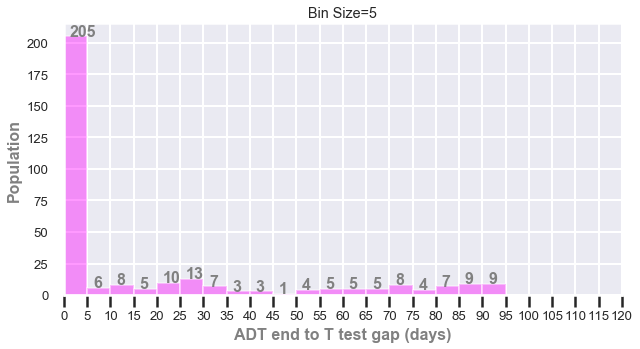

In [101]:
###plot
#adttgap['ADT_T_gap_days']

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=5

bins=np.arange(0, 100, binsize)
fig, ax = plt.subplots(figsize = (10,5))

(n, bins, patches) = plt.hist(adttgap['ADT_T_gap_days'], bins=bins,color="Magenta", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize)))
plt.xlabel("ADT end to T test gap (days)", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 1800, 5))
ax.set_xticklabels(np.arange(0, 1800, 5))
ax.set_xlim([0, 120])

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()

In [85]:
205+6+8+5+10+13+7+3+3+1+4+5+5+5+8+4+7+9+9

317

# Histgram for number of T dates 

index        791
N_T_dates     93
dtype: int64
index        0
N_T_dates    1
dtype: int64


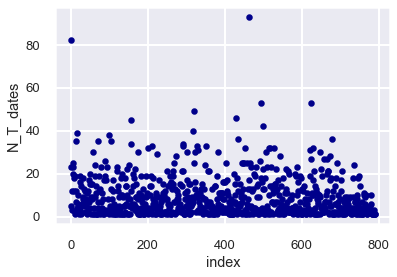

In [23]:
tnumber= df_results[["N_T_dates"]].reset_index()
ax=tnumber.plot.scatter(x= "index", y="N_T_dates", c='DarkBlue')
print(tnumber.max())
print(tnumber.min())

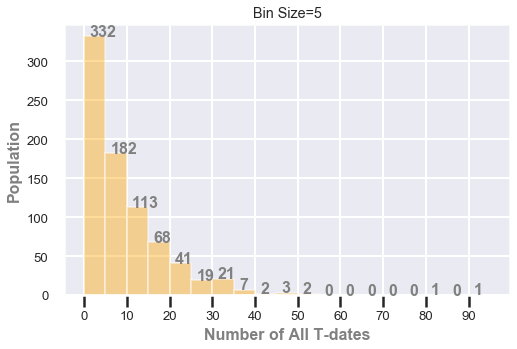

In [24]:
###plot the all T test number histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=5

bins=np.arange(0, 100, binsize)
fig, ax = plt.subplots(figsize = (8,5))

(n, bins, patches) = plt.hist(tnumber["N_T_dates"], bins=bins,color="orange", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize)))
plt.xlabel("Number of All T-dates", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 100, 10))
ax.set_xticklabels(np.arange(0, 100, 10))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()

index                 791
N_T_dates_afterADT     43
dtype: int64
index                 0
N_T_dates_afterADT    0
dtype: int64


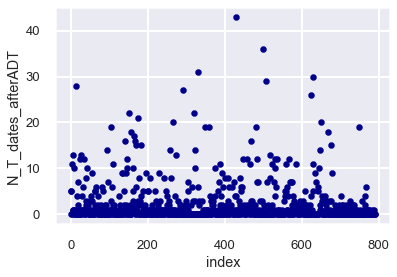

In [25]:
#histgram for number of T dates after ADT
t_after_adt_number= df_results[["N_T_dates_afterADT"]].reset_index()
ax=t_after_adt_number.plot.scatter(x= "index", y="N_T_dates_afterADT", c='DarkBlue')
print(t_after_adt_number.max())
print(t_after_adt_number.min())

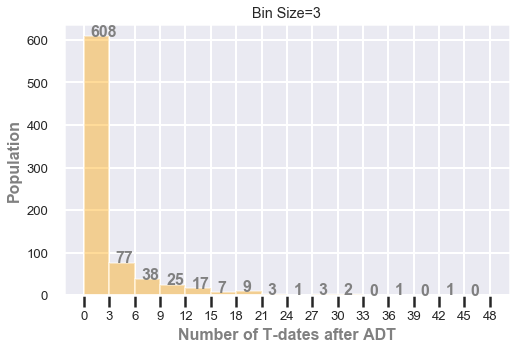

In [26]:
###plot histogram for T test number after ADT end date 

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=3

bins=np.arange(0, 50, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#t_after_adt_number= df_results[["N_T_dates_afterADT"]].reset_index()
(n, bins, patches) = plt.hist(t_after_adt_number["N_T_dates_afterADT"], bins=bins,color="orange", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize)))
plt.xlabel("Number of T-dates after ADT", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 50, 3))
ax.set_xticklabels(np.arange(0, 50, 3))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()

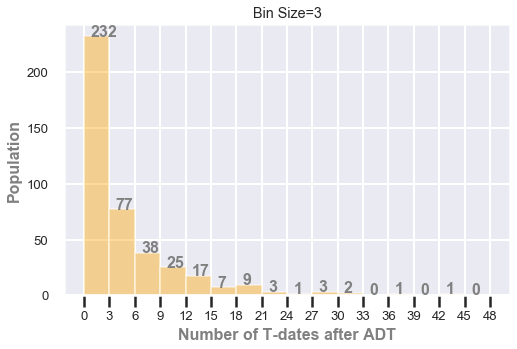

In [27]:
#Get rid of the zero T-dates 
t_after_adt_number= t_after_adt_number[t_after_adt_number["N_T_dates_afterADT"] != 0]

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=3

bins=np.arange(0, 50, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#t_after_adt_number= df_results[["N_T_dates_afterADT"]].reset_index()
(n, bins, patches) = plt.hist(t_after_adt_number["N_T_dates_afterADT"], bins=bins,color="orange", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize)))
plt.xlabel("Number of T-dates after ADT", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 50, 3))
ax.set_xticklabels(np.arange(0, 50, 3))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()

In [28]:
df_results.to_csv("Tdate_Tvalue_ADTwindow_Immediately_after_ADT_ends.csv", encoding='utf-8', index=False)

In [29]:
#Fix the T values that contain <; plot the histograms and make the presentation slides

In [30]:
###Need to fix this later

#df_results_select3=df_results_select2
#df_results_select3['Tvalue'][ind].str[1:]
#fixed_string_list=[]
#for ind in df_results_select2.index:
 
#    if (df_results_select3['Tvalue'][ind].str.contains('<')): 
#        fixed_string_list.append(ind)  
#        df_results_select3['Tvalue'][ind]=df_results_select3['Tvalue'][ind].str[1:]

#df_results_select3.loc[df_results_select3['Tvalue'].str.contains('<'), '<']=""
#s[1:]

In [31]:
df4=pd.read_excel("Tdate_Tvalue_cleaned_ADTwindow_Immediately_after_ADT_ends.xlsx", header=0)

In [32]:
df4

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate immediately after ADT,Tvalue
0,2,2017-02-01,2897,2017-02-01,15.64
1,13,2018-05-17,2891,NaT,NaN
2,18,2014-03-13,121,2014-12-02,31.30
3,22,2017-04-24,2401,NaT,NaN
4,25,2014-02-18,98,2015-02-18,149.89
...,...,...,...,...,...
787,199348,2020-08-31,137,NaT,NaN
788,200563,2020-07-06,89,2020-07-06,23.00
789,201026,2020-10-01,128,NaT,NaN
790,203736,2020-10-14,99,NaT,NaN


In [33]:
index_list=df4.columns
index_list

Index(['person_id', 'inital_ADT_end_date', 'Inital_ADT_time_window_days',
       'Tdate immediately after ADT', 'Tvalue'],
      dtype='object')

In [34]:
#delete some columns
   

In [35]:
print(df4.shape) 
df4[:5]
df4.dropna(subset=['Tvalue'], inplace=True)
print(df4.shape) 

(792, 5)
(416, 5)


In [36]:
df4=df4.reset_index()

index                           415
Inital_ADT_time_window_days    4506
dtype: int64
index                          0
Inital_ADT_time_window_days    0
dtype: int64


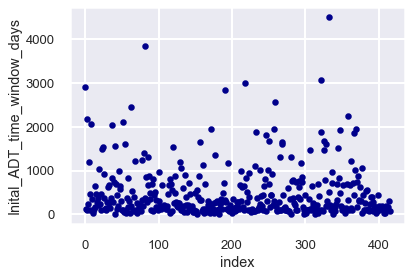

In [37]:
gap = df4[["Inital_ADT_time_window_days"]].reset_index()
ax=gap.plot.scatter(x= "index", y="Inital_ADT_time_window_days", c='DarkBlue')
print(gap.max())
print(gap.min())

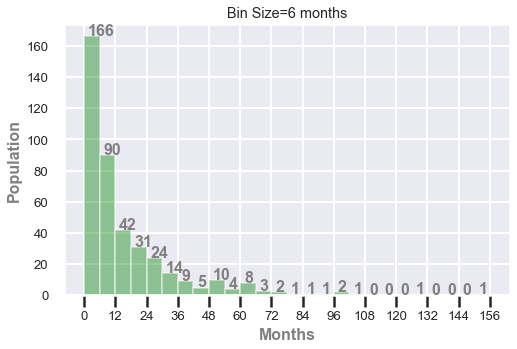

In [38]:
###for the 416 pt cohort
###plot the ADT window histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=180

bins=np.arange(0, 4800, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(gap["Inital_ADT_time_window_days"], bins=bins,color="green", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize/30)) +" months")
plt.xlabel("Months", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 4800, 360))
ax.set_xticklabels(np.arange(0, 160, 12))


# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()


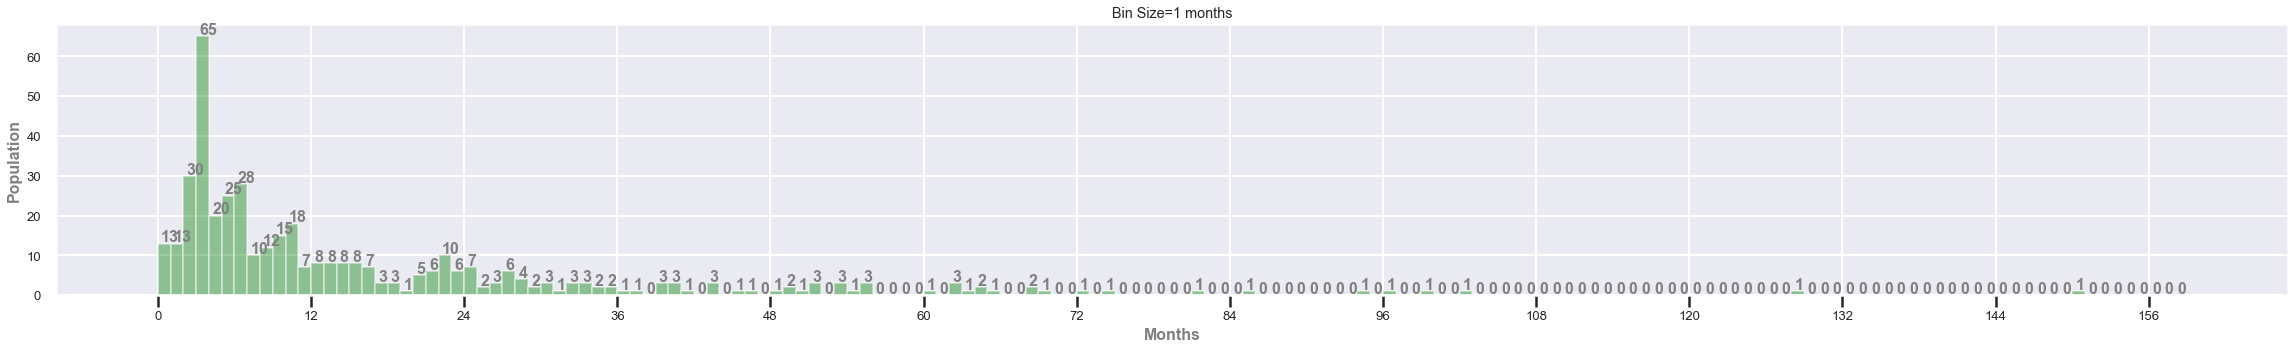

In [51]:
###for the 416 pt cohort
###plot the ADT window histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=30

bins=np.arange(0, 4800, binsize)
fig, ax = plt.subplots(figsize = (40,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(gap["Inital_ADT_time_window_days"], bins=bins,color="green", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize/30)) +" months")
plt.xlabel("Months", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 4800, 360))
ax.set_xticklabels(np.arange(0, 160, 12))


# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()



index      415.00
Tvalue    1083.86
dtype: float64
index     0.0
Tvalue    0.0
dtype: float64


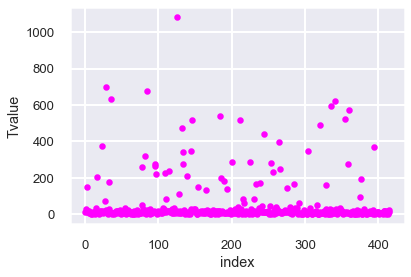

In [40]:
Tvalue = df4[["Tvalue"]].reset_index()
ax=Tvalue.plot.scatter(x= "index", y="Tvalue", c='Magenta')
print(Tvalue.max())
print(Tvalue.min())

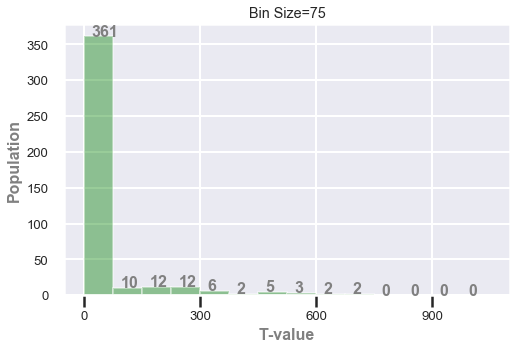

In [41]:
###plot the T value histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=75

bins=np.arange(0, 1100, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(Tvalue["Tvalue"], bins=bins,color="green", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize)))
plt.xlabel("T-value", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 1100, 300))
ax.set_xticklabels(np.arange(0, 1100, 300))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()



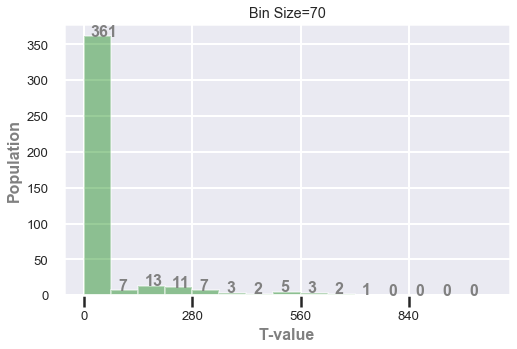

In [42]:
###plot the T value histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=70

bins=np.arange(0, 1100, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(Tvalue["Tvalue"], bins=bins,color="green", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize)))
plt.xlabel("T-value", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 1100, 280))
ax.set_xticklabels(np.arange(0, 1100, 280))


# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()




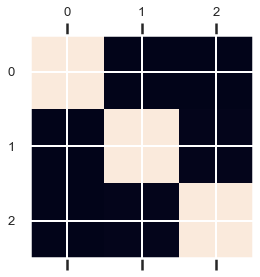

In [43]:
Correlation = df4[["Inital_ADT_time_window_days","Tvalue"]].reset_index()
plt.matshow(Correlation.corr())

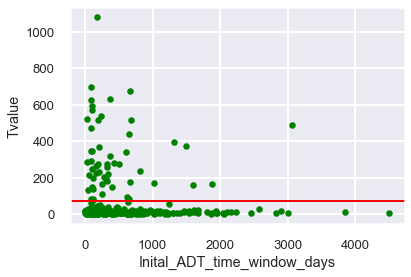

In [44]:
ax=Correlation.plot.scatter(x= "Inital_ADT_time_window_days", y="Tvalue", c='green')
plt.axhline(y=75, color='r', linestyle='-')

In [125]:
df_clean_for_gap[:5]

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate immediately after ADT,Tvalue,N_T_dates,N_T_dates_afterADT,ADT_T_gap,ADT_T_gap_days
0,2,2017-02-01,2897.0,2017-02-01,15.64,82,5,0 days,0.0
2,18,2014-03-13,121.0,2014-12-02,31.3,5,5,264 days,264.0
4,25,2014-02-18,98.0,2015-02-18,149.89,12,11,365 days,365.0
5,37,2016-09-02,2165.0,2016-09-27,14.74,23,1,25 days,25.0
6,38,2016-07-18,243.0,2016-07-18,17.18,20,13,0 days,0.0


In [129]:
df_clean_for_gap.Tvalue

0       15.64
2        31.3
4      149.89
5       14.74
6       17.18
        ...  
772     10.02
774     18.15
775        <3
783     11.65
788        23
Name: Tvalue, Length: 416, dtype: object

In [130]:
df_clean_for_gap.to_csv("gap.csv", encoding='utf-8', index=False)
df_clean_new_for_gap=pd.read_excel("gap.xls", header=0)

In [132]:
df_clean_new_for_gap

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate immediately after ADT,Tvalue,N_T_dates,N_T_dates_afterADT,ADT_T_gap,ADT_T_gap_days
0,2,2017-02-01,2897,2017-02-01,15.64,82,5,0 days 00:00:00.000000000,0
1,18,2014-03-13,121,2014-12-02,31.30,5,5,264 days 00:00:00.000000000,264
2,25,2014-02-18,98,2015-02-18,149.89,12,11,365 days 00:00:00.000000000,365
3,37,2016-09-02,2165,2016-09-27,14.74,23,1,25 days 00:00:00.000000000,25
4,38,2016-07-18,243,2016-07-18,17.18,20,13,0 days 00:00:00.000000000,0
...,...,...,...,...,...,...,...,...,...
411,191117,2020-08-12,177,2020-08-12,10.02,4,1,0 days 00:00:00.000000000,0
412,192449,2020-06-05,150,2020-06-05,18.15,3,1,0 days 00:00:00.000000000,0
413,193067,2020-07-28,179,2020-07-28,3.00,3,1,0 days 00:00:00.000000000,0
414,196207,2020-10-29,310,2020-10-29,11.65,2,1,0 days 00:00:00.000000000,0


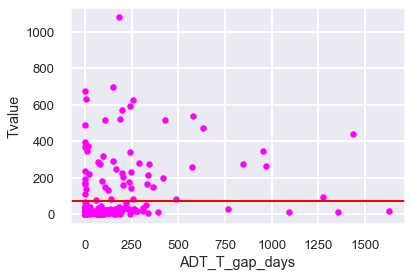

In [135]:
#for the 416 pts, correlation between ADT to T gap and T values
Correlation2=df_clean_new_for_gap[["ADT_T_gap_days","Tvalue"]].reset_index()
ax=Correlation2.plot.scatter(x= "ADT_T_gap_days", y="Tvalue", c='magenta')
plt.axhline(y=75, color='r', linestyle='-')